# Test Code

*  "C1" = Cluster 1
*  "CP" = Cluster Prime Parameter
*  "FGM" = Flux Gate Magnetometer
*  "5VPS" = 5 vectors/second resolution
*  Skeleton table: https://spdf.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/c1_cp_fgm_5vps_00000000_v01.skt

## Imports

In [1]:
import cdflib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from time import strftime, localtime
from datetime import datetime
import pandas as pd

In [2]:
# Extracts appropriate data
data_name = "C1_CP_FGM_5VPS"
data_date_version = "20200201_000000_20200202_000000_V210607"
cdf_filename = data_name + "__" + data_date_version + ".cdf"
# Results in cdf_filename = "C1_CP_FGM_5VPS__20200201_000000_20200202_000000_V210607.cdf"
data_date = data_date_version[0:8]

In [32]:
cdf_file = cdflib.CDF(cdf_filename) # Extracts the data
cdf_file.cdf_info() # Gets the information of all the data stored in the CDF

CDFInfo(CDF=WindowsPath('C:/Users/joels/OneDrive - Lancaster University/Academic/Lancaster/Project/Work/Coding/2024_10_15_Introductory/C1_CP_FGM_5VPS__20200201_000000_20200202_000000_V210607.cdf'), Version='3.7.0', Encoding=1, Majority='Row_major', rVariables=[], zVariables=['time_tags__C1_CP_FGM_5VPS', 'half_interval__C1_CP_FGM_5VPS', 'B_vec_xyz_gse__C1_CP_FGM_5VPS', 'B_mag__C1_CP_FGM_5VPS', 'sc_pos_xyz_gse__C1_CP_FGM_5VPS', 'range__C1_CP_FGM_5VPS', 'tm__C1_CP_FGM_5VPS', 'B_vec_xyz_gse__C1_CP_FGM_5VPS_REPRESENTATION_1', 'B_vec_xyz_gse__C1_CP_FGM_5VPS_LABEL_1', 'sc_pos_xyz_gse__C1_CP_FGM_5VPS_REPRESENTATION_1', 'sc_pos_xyz_gse__C1_CP_FGM_5VPS_LABEL_1'], Attributes=[{'LOGICAL_FILE_ID': 'Global'}, {'VERSION_NUMBER': 'Global'}, {'DATASET_VERSION': 'Global'}, {'FILE_TIME_SPAN': 'Global'}, {'GENERATION_DATE': 'Global'}, {'FILE_CAVEATS': 'Global'}, {'MISSION': 'Global'}, {'MISSION_TIME_SPAN': 'Global'}, {'MISSION_AGENCY': 'Global'}, {'MISSION_DESCRIPTION': 'Global'}, {'MISSION_KEY_PERSONNEL'

## Extract Data

The EPOCH data type is used to store time values referenced from a particular epoch. For NSSDC applications that epoch is 01-Jan-0000 00:00:00.000.

In [4]:
cluster_epoch = cdf_file.varget("time_tags__C1_CP_FGM_5VPS") # extracts the time in milliseconds.
cluster_fgm = cdf_file.varget("B_vec_xyz_gse__C1_CP_FGM_5VPS") # extracts the fgm data

### Testing

In [5]:
result = cdflib.cdfepoch.breakdown_epoch(cluster_epoch[0]) # one way to convert epoch to more user friendly time
print(result)
result_two = cdflib.cdfepoch.to_datetime(cluster_epoch) # another way to convert epoch to more user friendly time
print(result_two)
print(cluster_fgm[0])

[2020    2    1    0    0    0  100]
['2020-02-01T00:00:00.100000000' '2020-02-01T00:00:00.300000000'
 '2020-02-01T00:00:00.500000000' ... '2020-02-01T23:59:59.500000000'
 '2020-02-01T23:59:59.700000000' '2020-02-01T23:59:59.900000000']
[ 11.611 -15.432  -5.425]


In [6]:
df = pd.DataFrame(cluster_fgm, columns=['B_x', 'B_y', 'B_z'])

In [7]:
print(cluster_epoch)

[6.37477344e+13 6.37477344e+13 6.37477344e+13 ... 6.37478208e+13
 6.37478208e+13 6.37478208e+13]


In [8]:
epoch=cluster_epoch[0]
epoch=epoch
print(epoch)
epoch=33456871
print(epoch)
epoch_date_time = datetime.fromtimestamp(epoch)
print(epoch_date_time)

63747734400100.0
33456871
1971-01-23 05:34:31


In [9]:
cluster_epoch.shape # 429866 data points (5 per second x 86400 data points)

(429866,)

# Plotting

Text(112.72222222222221, 0.5, 'C1_CP_FGM_5VPS')

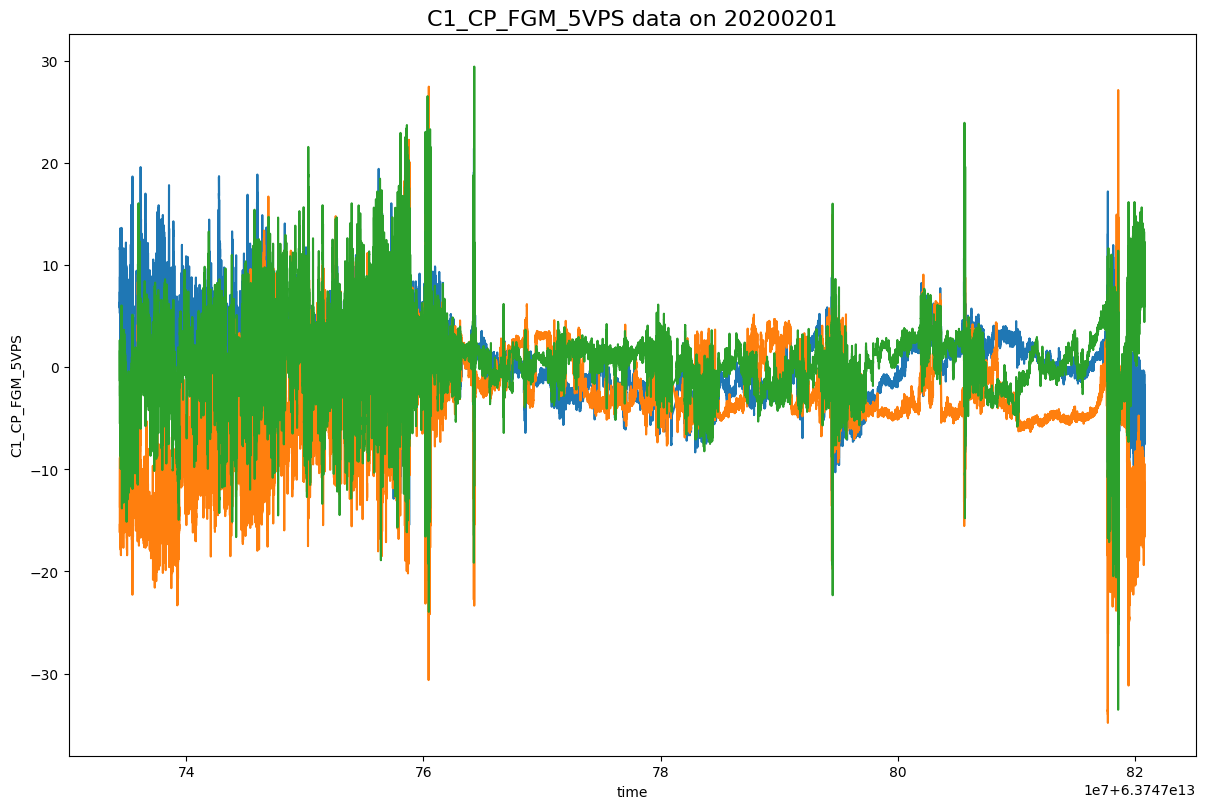

In [10]:
fig = plt.figure(figsize=(12,8))
plt.title(f'{data_name} data on {data_date}', fontsize=16)
plt.tight_layout()
plt.plot(cluster_epoch,cluster_fgm)
plt.xlabel("time")
plt.ylabel(data_name)
#plt.savefig(f'{data_name} data on {data_date}.png',bbox_inches='tight')

## Separating Axes

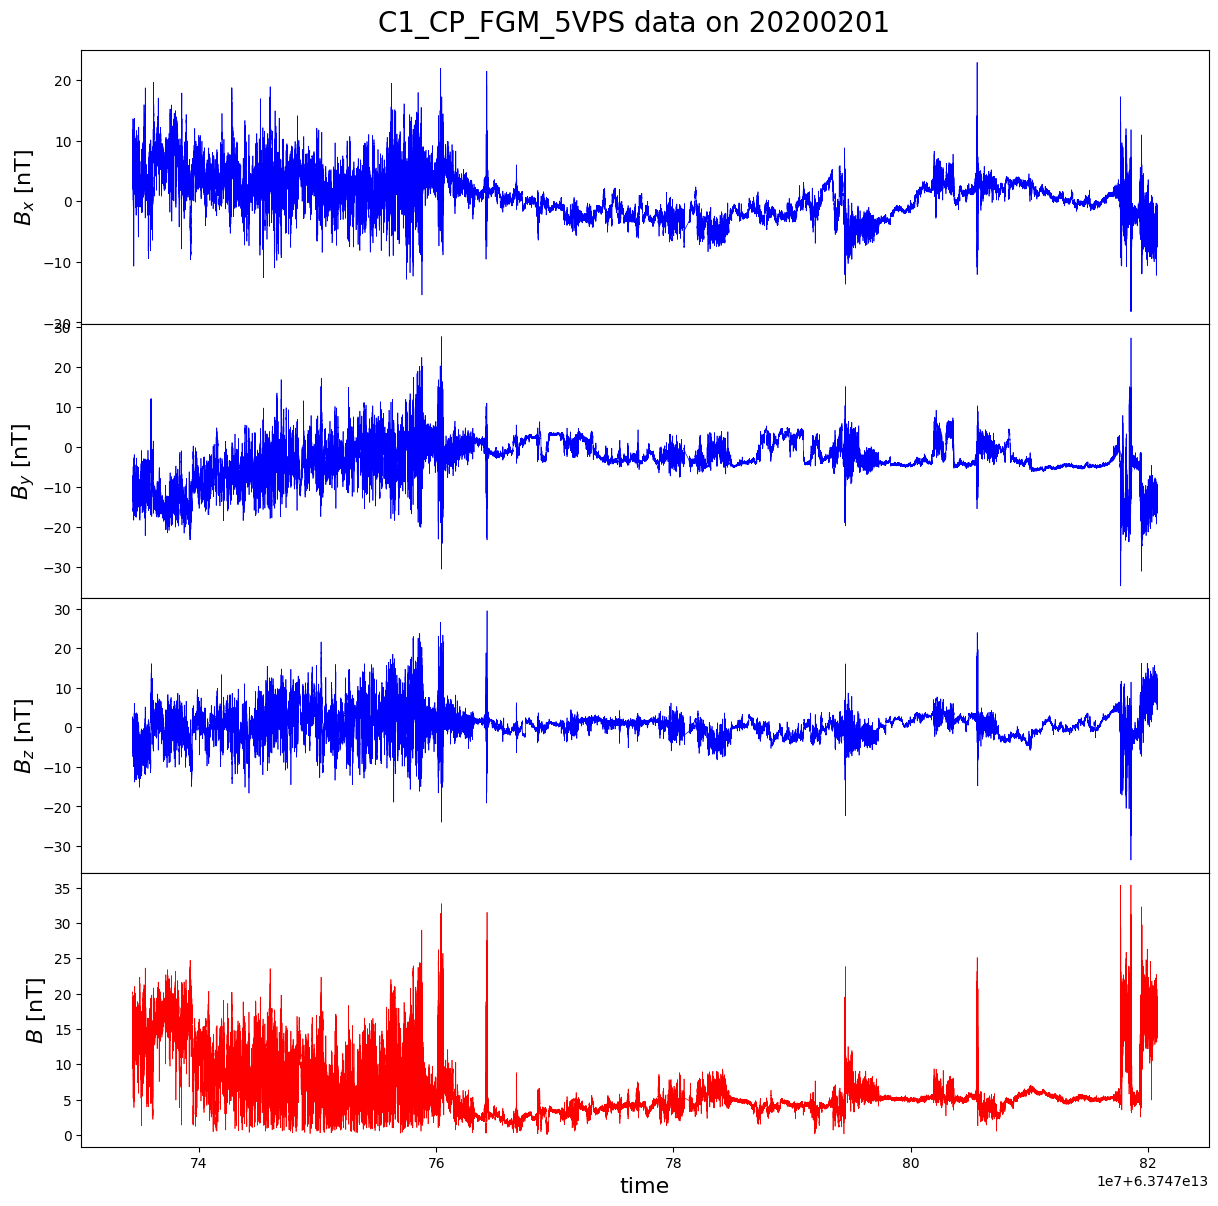

In [34]:
fig, axs = plt.subplots(4, figsize=(12,12), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
fig.suptitle(f'{data_name} data on {data_date}', fontsize=20)
plt.tight_layout()

cluster_data = {
    "time": cluster_epoch,
    "fgm": cluster_fgm
}

plot_time = cluster_data["time"]
plot_vector = cluster_data["fgm"]

vector_x = plot_vector[:,0]
vector_y = plot_vector[:,1]
vector_z = plot_vector[:,2]
vector_mag = np.linalg.norm(plot_vector,axis=1)

axs[0].plot(plot_time,vector_x,c='b',lw=0.5)
axs[1].plot(plot_time,vector_y,c='b',lw=0.5)
axs[2].plot(plot_time,vector_z,c='b',lw=0.5)
axs[3].plot(plot_time,vector_mag,c='r',lw=0.5)

plt.xlabel(r'time', fontsize=16)

axs[0].set_ylabel(r'$B_x$ [nT]', fontsize=16)
axs[1].set_ylabel(r'$B_y$ [nT]', fontsize=16)
axs[2].set_ylabel(r'$B_z$ [nT]', fontsize=16)
axs[3].set_ylabel(r'$B$ [nT]', fontsize=16);

#plt.savefig(f'{data_name} data on {data_date}.png',bbox_inches='tight')

## Cleaning epoch data

In [36]:
def vector_to_pandas(epoch_data, vector_data):
    """
    Function to convert epoch data and data for a vector field into a pandas dataframe.
    """
    # Concerts epoch time (since 0AD) into 'datetime'
    datetime_data = cdflib.cdfepoch.to_datetime(epoch_data)
    
    # Create a pandas dataFrame
    df = pd.DataFrame(vector_data, columns=['x', 'y', 'z'])

    # Add the epoch (time) column
    df['epoch'] = datetime_data
    
    # Add the magnitude column
    df['mag'] = np.linalg.norm(vector_data,axis=1)

    # Rearrange columns to have 'epoch' first
    df = df[['epoch', 'x', 'y', 'z', 'mag']]
    
    return df

In [37]:
df_fgm = vector_to_pandas(cluster_epoch, cluster_fgm)

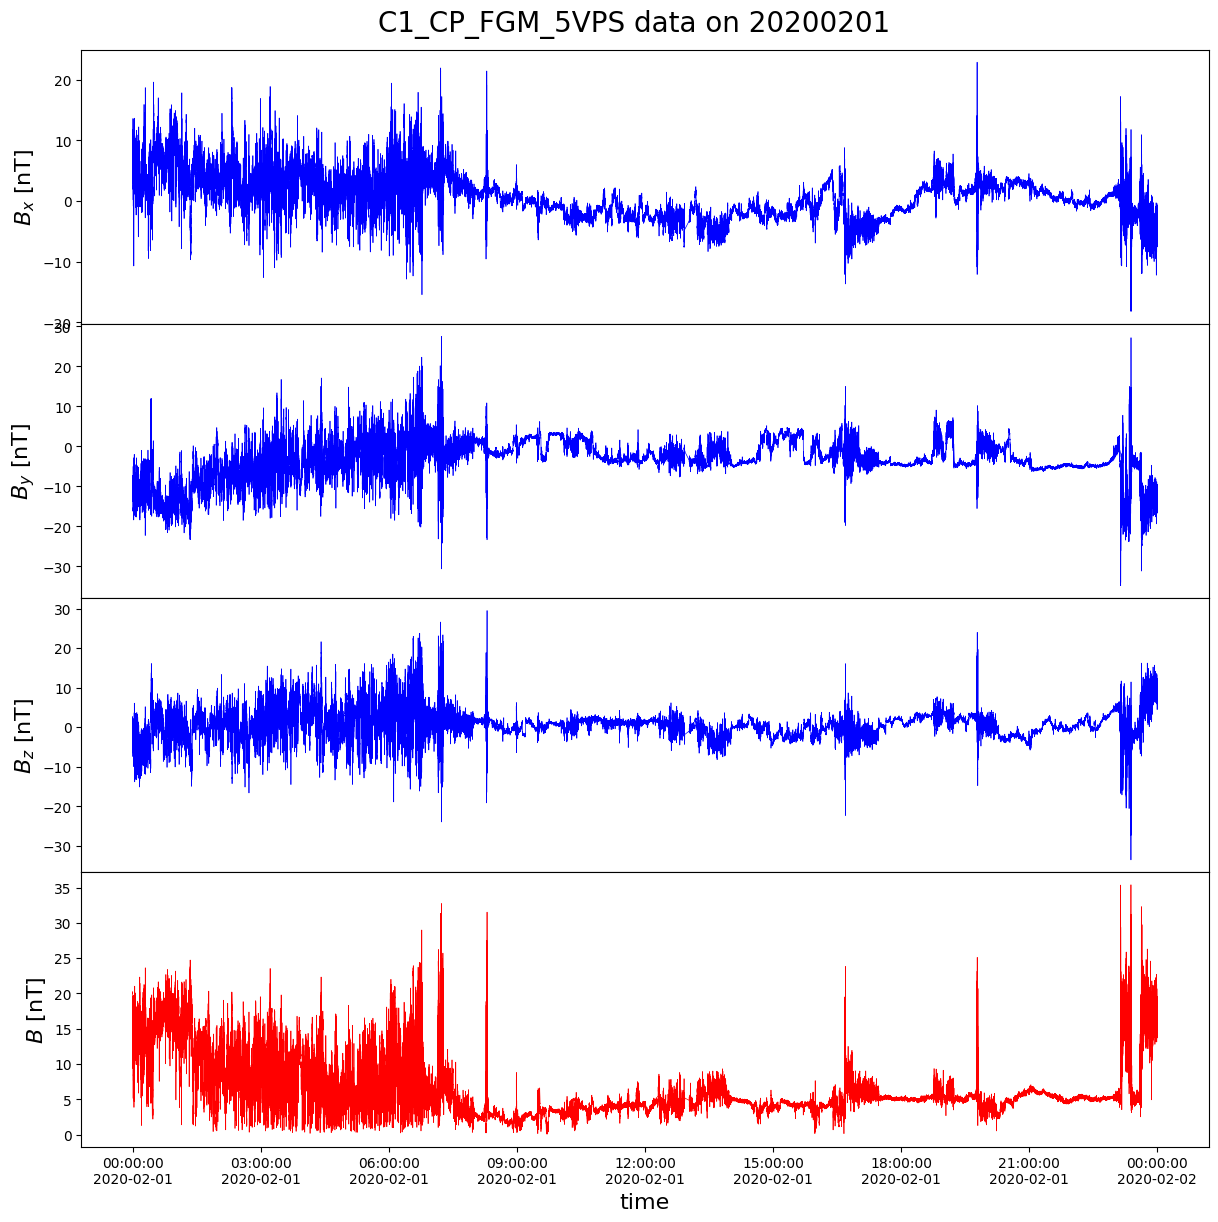

In [30]:
fig, axs = plt.subplots(4, figsize=(12,12), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
fig.suptitle(f'{data_name} data on {data_date}', fontsize=20)

# Adjust the layout so that labels/titles don't overlap
plt.tight_layout()

# Plot B_x, B_y, and B_z against epoch on different axes
axs[0].plot(df_fgm['epoch'], df_fgm['x'], c='b', lw=0.5)
axs[1].plot(df_fgm['epoch'], df_fgm['y'], c='b', lw=0.5)
axs[2].plot(df_fgm['epoch'], df_fgm['z'], c='b', lw=0.5)
axs[3].plot(df_fgm['epoch'], df_fgm['mag'], c='r', lw=0.5)

# Add labels and title
plt.xlabel(r'time', fontsize=16) # or axs[2].set_xlabel

# Format the x-axis to display full dates and times with more detail
# E.g., "Year-Month-Day Hour:Minute:Second"
date_format = mdates.DateFormatter('%H:%M:%S\n%Y-%m-%d')
axs[2].xaxis.set_major_formatter(date_format)

axs[0].set_ylabel(r'$B_x$ [nT]', fontsize=16)
axs[1].set_ylabel(r'$B_y$ [nT]', fontsize=16)
axs[2].set_ylabel(r'$B_z$ [nT]', fontsize=16)
axs[3].set_ylabel(r'$B$ [nT]', fontsize=16);


#plt.savefig(f'{data_name} data on {data_date}.png',bbox_inches='tight')